<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>ANN - House Price Prediction</b></p>

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

The "kc_house_data" dataset contains data about home sales that occurred in Seattle, Washington in 2014. The exact date the dataset was collected is not specified, but the dataset description mentions that the home sales occurred between May 2014 and May 2015.

We will be using data from a Kaggle dataset:

[Click here to learn about the dataset](https://www.kaggle.com/harlfoxem/housesalesprediction)

**Feature Columns**:

- **id**: Unique ID for each home sold
- **date**: Date of the home sale
- **price**: Price of each home sold
- **bedrooms**: Number of bedrooms
- **bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- **sqft_living**: Square footage of the apartment's interior living space
- **sqft_lot**: Square footage of the land space
- **floors**: Number of floors
- **waterfront**: A dummy variable for whether the apartment was overlooking the waterfront or not
- **view**: An index from 0 to 4 of how good the view of the property was
- **condition**: An index from 1 to 5 on the condition of the apartment
- **grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
- **sqft_above**: The square footage of the interior housing space that is above ground level
- **sqft_basement**: The square footage of the interior housing space that is below ground level
- **yr_built**: The year the house was initially built
- **yr_renovated**: The year of the house’s last renovation
- **zipcode**: What zipcode area the house is in
- **lat**: Latitude
- **long**: Longitude
- **sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors

In [48]:
df = pd.read_csv("kc_house_data.csv")

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


# <font color='orange'> <b>Understanding The Data & EDA</b><font color='black'>  

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [52]:
df.isnull().sum().any()

False

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


## <font color='gold'> <b>"id_number" Column</b><font color='black'>  

In [55]:
df = df.drop('id', axis = 1)

## <font color='gold'> <b>"price" Column</b><font color='black'>  

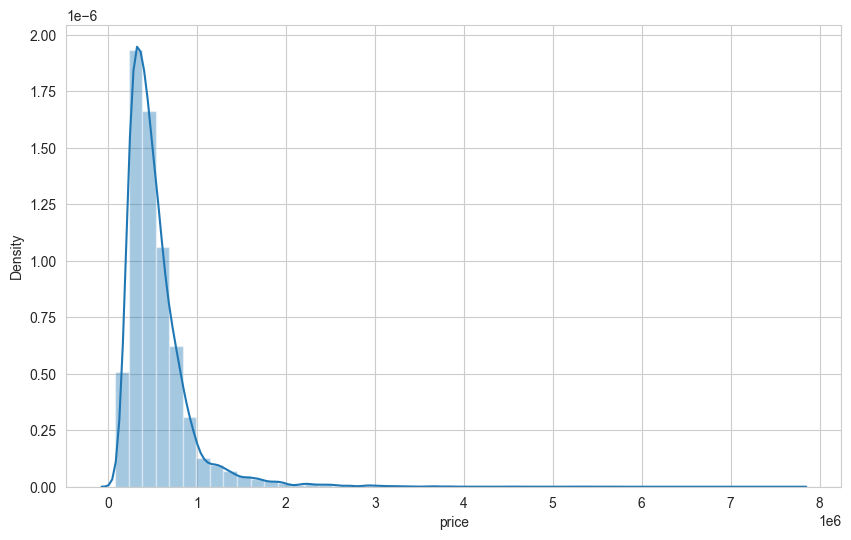

In [57]:
sns.distplot(df['price']);

In [58]:
# See Outlier status on a feature basis
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


This code block is used to examine correlations between columns within a "df" data frame and visualize the relationship of the "price" column to other columns.

In [60]:
 df['date'] = pd.to_datetime(df['date'])   # Performing datatime conversion in the date column to avoid errors in the corr relationship

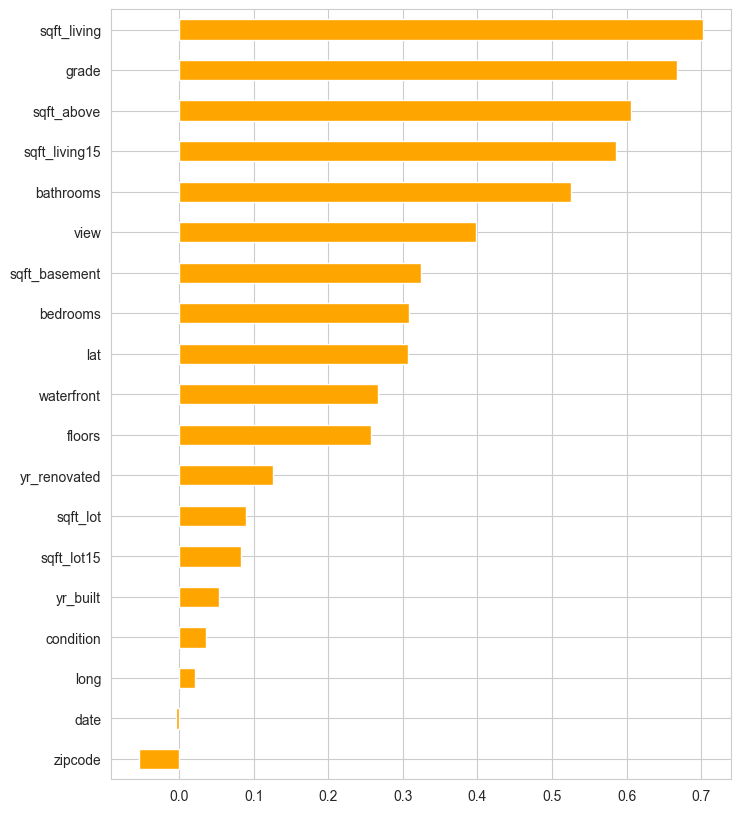

In [71]:
plt.figure(figsize = (8,10))
df.corr()["price"].sort_values().drop("price").plot(kind = "barh", color='orange');

## <font color='gold'> <b>"sqft_living" Column</b><font color='black'>  

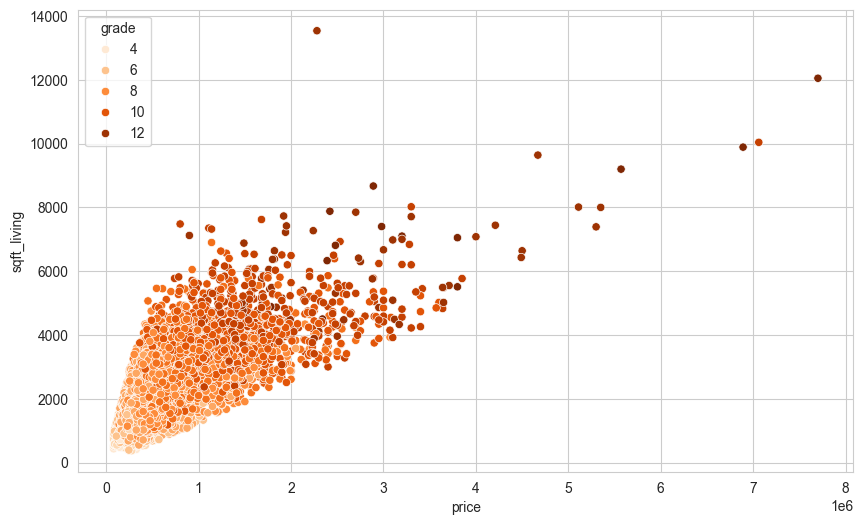

In [39]:
sns.scatterplot(x = "price", y = "sqft_living", data = df, hue = "grade", palette="Oranges");

## <font color='gold'> <b>"bedrooms and floors" Columns</b><font color='black'>  

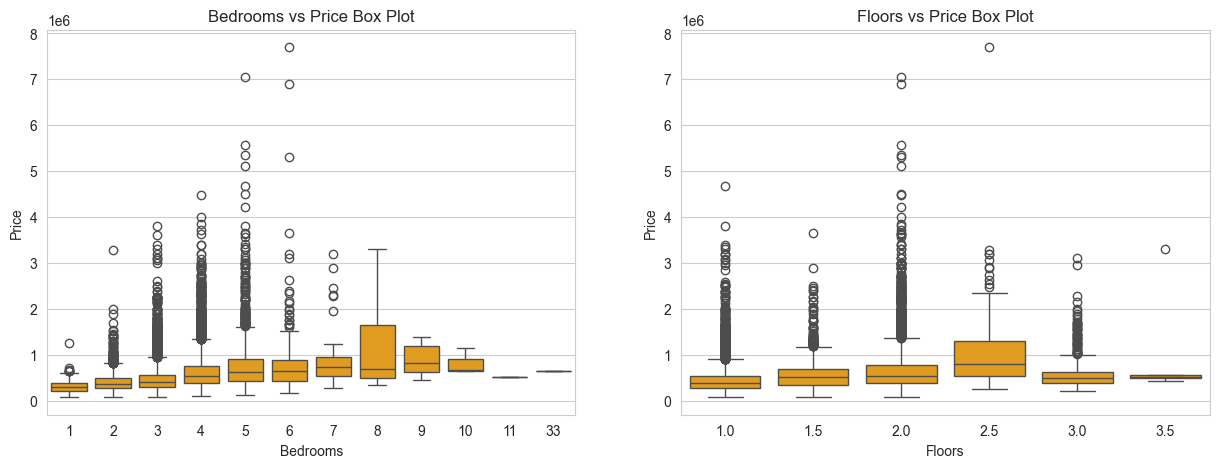

In [73]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0], color='orange')
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1], color='orange')

axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')
plt.show()

In [75]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014-08-21,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,2014-06-25,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [77]:
df = df[df["bedrooms"] != 33]     # This is how to remove line 15856 from the data set.  

In [79]:
df.shape

(21596, 20)

In [81]:
df[df["floors"] == 3.50]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,2014-08-01,435000.000,3,3.000,1440,1350,3.500,0,2,3,8,1440,0,2005,0,98103,47.653,-122.345,1440,1350
11582,2015-01-30,544000.000,3,2.500,1760,1755,3.500,0,0,3,8,1760,0,1998,0,98105,47.669,-122.279,1700,1721
14871,2015-04-02,525000.000,3,3.000,1730,1074,3.500,0,0,3,8,1730,0,2006,0,98107,47.669,-122.392,1370,1185
15410,2015-04-16,479000.000,2,2.500,1730,1037,3.500,0,0,3,8,1730,0,2008,0,98118,47.559,-122.285,1280,1026
18462,2014-10-20,3300000.000,8,4.000,7710,11750,3.500,0,0,5,12,6090,1620,1904,0,98112,47.626,-122.314,4210,8325
20292,2014-09-18,525000.000,2,2.750,1310,1268,3.500,0,0,3,8,1310,0,2007,0,98103,47.653,-122.355,1350,1288
20756,2014-06-25,563500.000,3,2.500,1400,1312,3.500,0,0,3,8,1400,0,2007,0,98103,47.653,-122.355,1350,1312


## <font color='gold'> <b>"date" Column</b><font color='black'>  

In [83]:
df['date'].dtype

dtype('<M8[ns]')

In [85]:
df['date'] = pd.to_datetime(df['date'])

This line of code is used to convert the date data in the "date" column to the datetime data type using the pd.to_datetime() function from the pandas library. Date data is often stored as text or numerical types, while the datetime data type is used to more effectively represent date and time information.


In [88]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [90]:
df['year'] = df['date'].dt.year

df['month'] = df['date'].dt.month

In [92]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21596 non-null  datetime64[ns]
 1   price          21596 non-null  float64       
 2   bedrooms       21596 non-null  int64         
 3   bathrooms      21596 non-null  float64       
 4   sqft_living    21596 non-null  int64         
 5   sqft_lot       21596 non-null  int64         
 6   floors         21596 non-null  float64       
 7   waterfront     21596 non-null  int64         
 8   view           21596 non-null  int64         
 9   condition      21596 non-null  int64         
 10  grade          21596 non-null  int64         
 11  sqft_above     21596 non-null  int64         
 12  sqft_basement  21596 non-null  int64         
 13  yr_built       21596 non-null  int64         
 14  yr_renovated   21596 non-null  int64         
 15  zipcode        21596 non

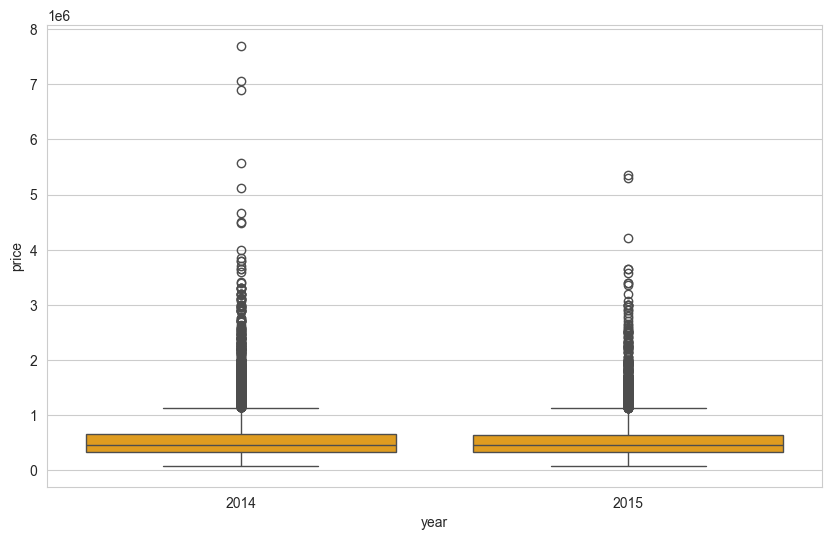

In [96]:
sns.boxplot(x = "year", y = "price", data = df, color='orange');

In [98]:
month_dummy = pd.get_dummies(df["month"], prefix = "month")
df = pd.concat([df, month_dummy], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10,False,False,False,False,False,False,False,False,False,True,False,False
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2,False,True,False,False,False,False,False,False,False,False,False,False
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12,False,False,False,False,False,False,False,False,False,False,False,True
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2,False,True,False,False,False,False,False,False,False,False,False,False


In [100]:
# removing features that cannot enter the model from the dataset
df = df.drop(['date', "year", "month"], axis = 1)

## <font color='gold'> <b>"zipcode" Column</b><font color='black'>  

In [102]:
df['zipcode'].value_counts(dropna = False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

This code is aimed at displaying the number of different zip codes in the "zipcode" column of the DataFrame. It allows you to see how many times the same zip code appears in the DataFrame.

The value_counts() function is frequently used to understand the distribution of data by counting unique values. The dropna = False parameter ensures that missing (NaN) values are included as well.

In [104]:
# dropping zipcode column too
df = df.drop('zipcode', axis = 1)

## <font color='gold'> <b>Final Version of Dataset</b><font color='black'>  

In [106]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,False,False,False,False,False,False,False,False,False,False,False,True
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,False,True,False,False,False,False,False,False,False,False,False,False
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,False,False,False,False,False,False,False,False,False,False,False,True
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,False,True,False,False,False,False,False,False,False,False,False,False


In [108]:
df.shape

(21596, 30)

# <font color='orange'> <b>Preprocessing of Data</b><font color='black'>  

## <font color='gold'> <b>Train | Test Split</b><font color='black'>  

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## <font color='gold'> <b>Scaling</b><font color='black'>  

In [116]:
from sklearn.preprocessing import MinMaxScaler 

In [118]:
scaler = MinMaxScaler()

In [120]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <font color='orange'> <b>Modeling & Model Performance</b><font color='black'>  

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [126]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [128]:
X_train.shape

(19436, 29)

In [130]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss = 'mse')

**Val loss (validation loss)** and **loss (training loss)** are two different error metrics calculated during the training of a model.

Training loss (loss) measures how well the model fits the training data. When the model fits the training data perfectly, the training loss is close to zero. However, no matter how low the training loss is, it does not necessarily mean the model will perform well in real-world scenarios. Therefore, the validation loss (val loss) is calculated to assess the model's performance.

Validation loss (val loss) measures how well the model generalizes on a separate data set (validation data) compared to a portion of the training data on which it was trained. The validation loss may be higher than the training loss because the model's performance might be lower on new, unseen data.

Typically, the training loss is lower than the validation loss. However, if the model overfits, the validation loss may increase while the training loss remains low. Therefore, monitoring the validation loss during training is important as it gives insight into how well the model is likely to perform in real-world scenarios and helps detect overfitting.

---

**Validation split** is the process of separating a certain percentage of the dataset as validation data. This percentage usually ranges from 10% to 30% and may vary depending on the size of the dataset and the model.

In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,237 (43.90 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492 (29.27 KB)

In [132]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 500)

Epoch 1/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 426031546368.0000 - val_loss: 423292370944.0000
Epoch 2/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 420055580672.0000 - val_loss: 320304840704.0000
Epoch 3/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 233043574784.0000 - val_loss: 105252610048.0000
Epoch 4/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 93464543232.0000 - val_loss: 102092595200.0000
Epoch 5/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 96453558272.0000 - val_loss: 98131763200.0000
Epoch 6/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 92057681920.0000 - val_loss: 94205935616.0000
Epoch 7/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 88832983040.0000 - val_loss: 89377882112.0000
Epoch 8/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 77641236480.0000 - val_loss: 84414300160.0000
Epoch 9/500
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 73552035840.0000 - val_loss: 79034343424.0000
Epoch 10/500
130/130 ━━━━━━━━━

In [87]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,428326486016.000,421824954368.000
1,378549862400.000,249013862400.000
2,126168825856.000,105317695488.000
3,95653568512.000,101151105024.000
4,91458035712.000,97034895360.000
...,...,...
495,16951797760.000,24406609920.000
496,16989963264.000,23990919168.000
497,16875239424.000,24261789696.000
498,16864188416.000,24023072768.000


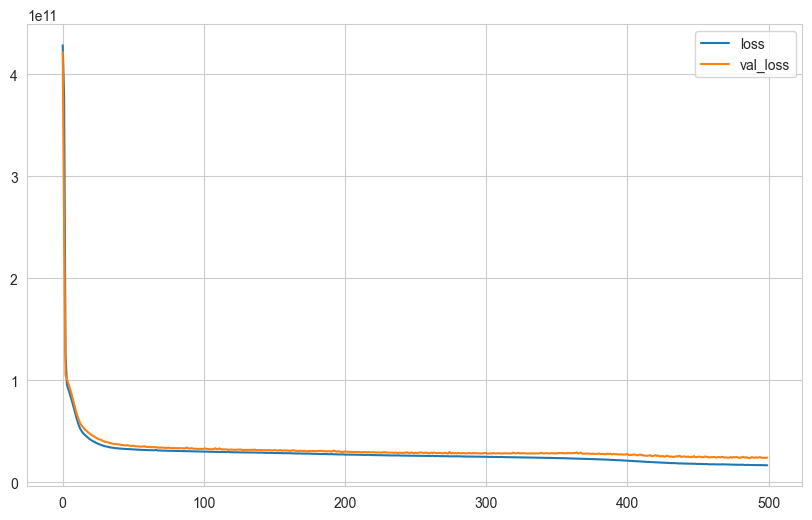

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [91]:
model.evaluate(X_test, y_test, verbose=0)

16727709696.0

In [93]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [95]:
eval_metric(y_test, y_pred)

r2_score: 0.8698027658542151 
mae: 77660.77078269675 
mse: 16727709647.925192 
rmse: 129335.64724361645


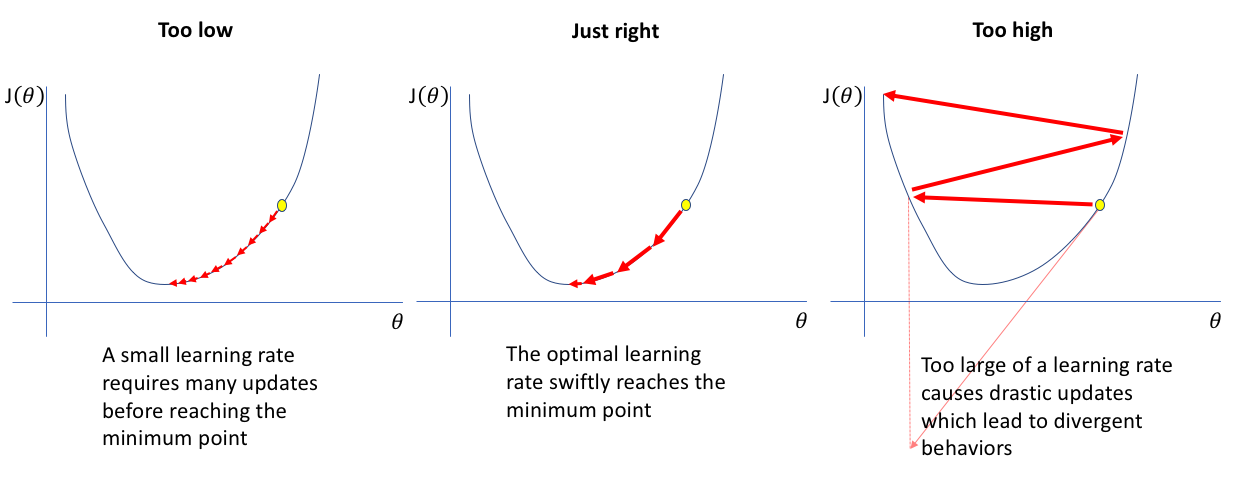

**learning_rate**

The learning rate is an important hyperparameter in the training of deep learning models. This parameter determines how fast or slow the model will learn.

The learning rate is used in the gradient descent method to update the model's weights. Gradient descent is an optimization algorithm used to update the model's weights in order to reach the minimum value of the loss function. The main goal of gradient descent is to reduce the model's loss value by making a step towards the minimum point of the loss function.

The optimal learning rate can vary depending on the dataset, the complexity of the model, and the training algorithm. The ideal learning rate provides the most suitable rate for minimizing the model's loss value. The learning rate is determined by monitoring the validation set during training, and hyperparameter tuning is performed accordingly.

The learning rate is an important hyperparameter in the training of deep learning models. This parameter determines how fast or slow the model will learn.

The learning rate is used in the gradient descent method to update the model's weights. Gradient descent is an optimization algorithm used to update the model's weights in order to reach the minimum value of the loss function. The main goal of gradient descent is to reduce the model's loss value by making a step towards the minimum point of the loss function.

The optimal learning rate can vary depending on the dataset, the complexity of the model, and the training algorithm. The ideal learning rate provides the most suitable rate for minimizing the model's loss value. The learning rate is determined by monitoring the validation set during training, and hyperparameter tuning is performed accordingly.


In [97]:
from tensorflow.keras.optimizers import Adam

In [99]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)      # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [101]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 500)

Epoch 1/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 362650042368.0000 - val_loss: 97862344704.0000
Epoch 2/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90121396224.0000 - val_loss: 69600362496.0000
Epoch 3/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51428339712.0000 - val_loss: 53951971328.0000
Epoch 4/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45191315456.0000 - val_loss: 49572720640.0000
Epoch 5/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39079104512.0000 - val_loss: 47921258496.0000
Epoch 6/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41678712832.0000 - val_loss: 48022011904.0000
Epoch 7/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42914521088.0000 - val_loss: 44562243584.0000
Epoch 8/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38527102976.0000 - val_loss: 43605278720.0000
Epoch 9/500
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37603303424.0000 - val_loss: 42216988672.0000
Epoch 10/500
259/259 ━━━━━━━━━━━━━━━

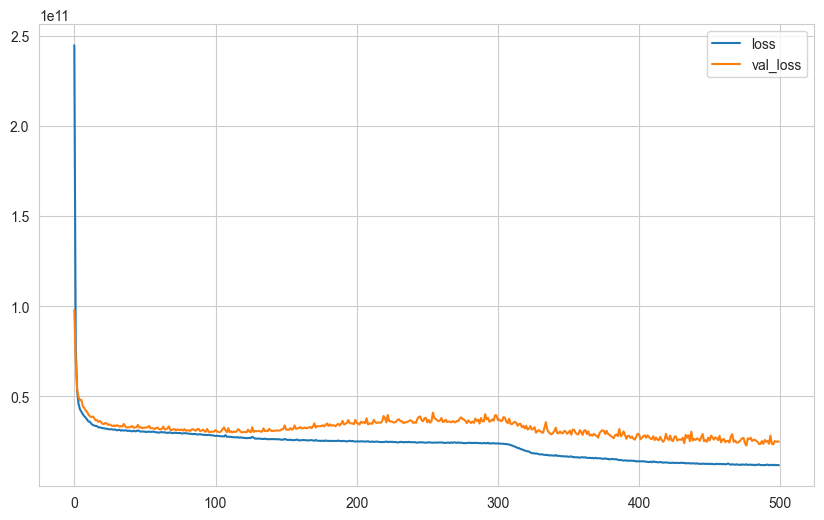

In [103]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [105]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [107]:
eval_metric(y_test, y_pred)

r2_score: 0.904168270494495 
mae: 70372.60553385416 
mse: 12312437792.892172 
rmse: 110961.42479660295


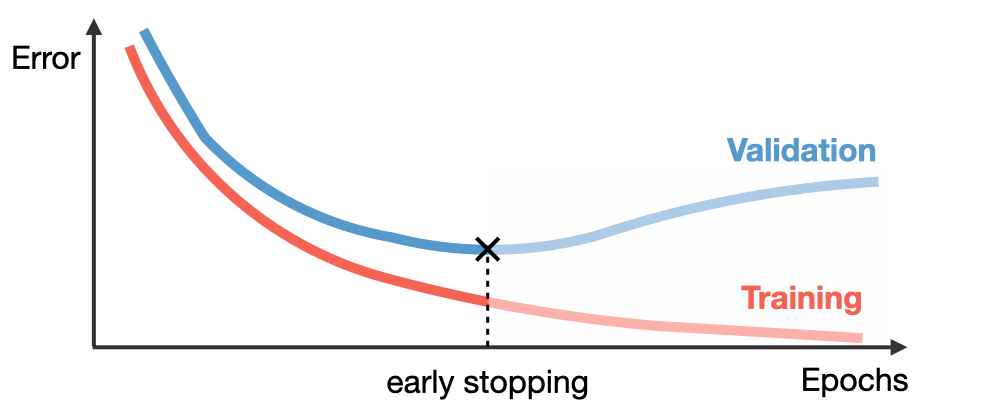

**EarlyStopping**

Early stopping is a technique used in deep learning models to prevent overfitting. This technique reduces the risk of overfitting by stopping the model's training at a certain point during the training process.

Early stopping works by monitoring the validation loss values during training. At the end of each epoch, the model's validation loss on the validation set is calculated. These values record the lowest loss value before any "explosion" occurs.

An explosion occurs when the model shows excessive fitting, and the validation loss increases, indicating overfitting. The early stopping technique ends the training after the explosion, assuming that the model will not perform better after that point.

Early stopping helps prevent overfitting while saving time and computational resources. However, the use of early stopping should be applied correctly, and an optimal number of epochs should be chosen. Otherwise, issues such as insufficient training or premature termination of training can arise.

In [109]:
from tensorflow.keras.callbacks import EarlyStopping

In [111]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [113]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 50)

In [115]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 64, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 389641469952.0000 - val_loss: 101976956928.0000
Epoch 2/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 91842535424.0000 - val_loss: 84701700096.0000
Epoch 3/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67614597120.0000 - val_loss: 64011538432.0000
Epoch 4/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56448778240.0000 - val_loss: 53972287488.0000
Epoch 5/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46593626112.0000 - val_loss: 50522636288.0000
Epoch 6/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42539921408.0000 - val_loss: 48281882624.0000
Epoch 7/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41142620160.0000 - val_loss: 46105227264.0000
Epoch 8/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37667295232.0000 - val_loss: 44997771264.0000
Epoch 9/1000
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40343101440.0000 - val_loss: 43772485632.0000
Epoch 10/1000
259/259 ━━━━

The model stopped before completing 1000 epochs because the **patience = 50** value specifies how many epochs the training process will wait without improvement in the monitored metric (in this case, val_loss, or validation loss). In other words, if there is no improvement in validation loss over a certain number of epochs (50 epochs in this case), the training will be stopped.


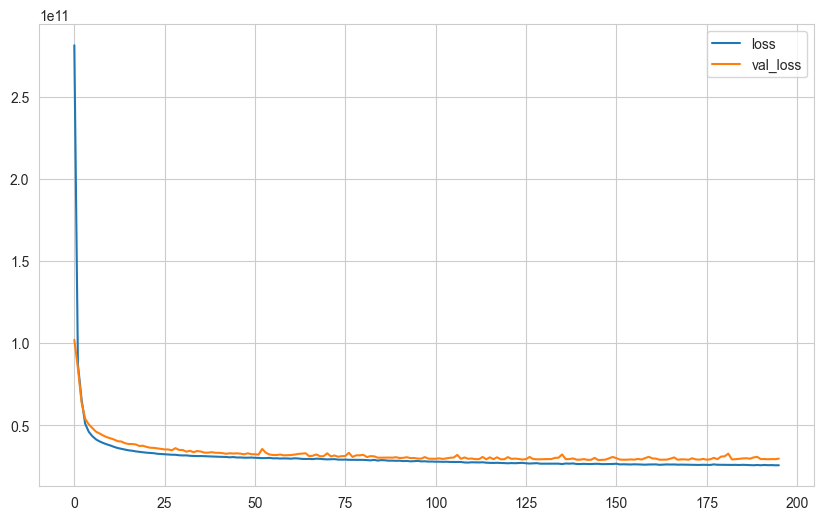

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [119]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [121]:
eval_metric(y_test, y_pred)       

r2_score: 0.8237116646050089 
mae: 97354.75480685764 
mse: 22649483363.844067 
rmse: 150497.45301447486


**Dropout**

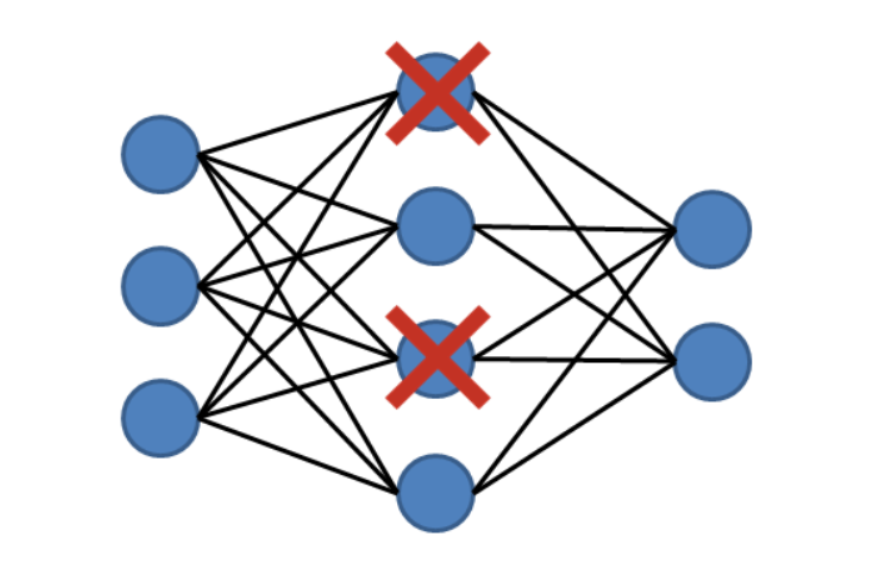

Dropout is a technique used in deep learning models to prevent overfitting. It works by randomly disabling some neurons during training.

Dropout involves disabling the connections of each neuron with a certain probability during a training step. This results in using a different subset of input data. By creating a different model at each training step, it reduces the risk of the model becoming overfitted.

The dropout technique helps the model generalize better by creating sparse features, as neurons do not have to share learned features with other neurons. Additionally, dropout techniques can make the model more robust by reducing the effects of weighted and noisy data.

Dropout can be an effective solution to the overfitting problem that arises due to the large number of parameters in deep learning models. However, using dropout adds some training time and requires more training steps. Furthermore, in some cases, dropout may reduce the model's performance by skipping important features of neurons. Therefore, the dropout technique should be applied carefully, and an optimal probability value should be chosen.

In [123]:
from tensorflow.keras.layers import Dropout

In [125]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003)
model.compile(optimizer = opt, loss = 'mse')

In [127]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [129]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 440133844992.0000 - val_loss: 108811190272.0000
Epoch 2/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124269027328.0000 - val_loss: 95428673536.0000
Epoch 3/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106769358848.0000 - val_loss: 80874029056.0000
Epoch 4/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101909217280.0000 - val_loss: 68171902976.0000
Epoch 5/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90699743232.0000 - val_loss: 59609772032.0000
Epoch 6/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81867972608.0000 - val_loss: 56679677952.0000
Epoch 7/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82448908288.0000 - val_loss: 49693925376.0000
Epoch 8/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76191326208.0000 - val_loss: 50461945856.0000
Epoch 9/1000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69045551104.0000 - val_loss: 46985420800.0000
Epoch 10/1000
130/130 ━

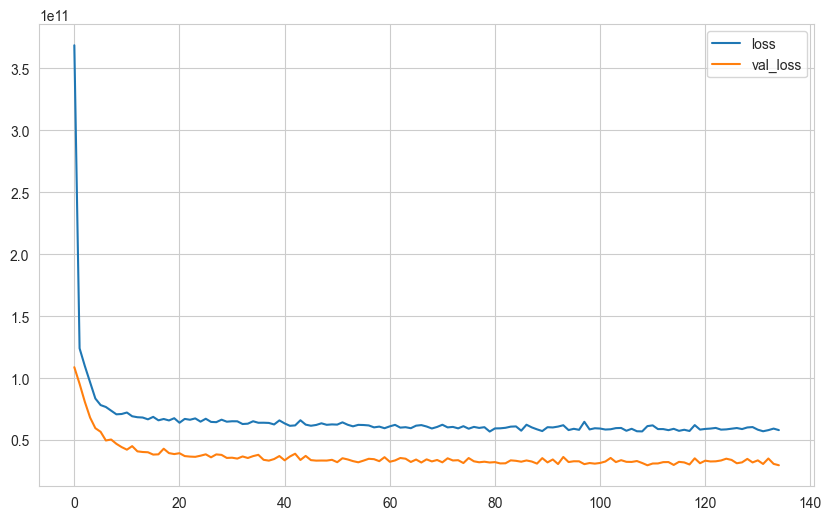

In [131]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [133]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [135]:
eval_metric(y_test, y_pred)

r2_score: 0.8089258781163582 
mae: 98529.75020254629 
mse: 24549157691.95937 
rmse: 156681.70822390012


## <font color='gold'> <b>Saving Final Model and Scaler</b><font color='black'>  

In [151]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler().fit(X)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [153]:
X_scaled = scaler.transform(X)

In [155]:
model = Sequential()

model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

opt = Adam(learning_rate = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [157]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25)

In [159]:
model.fit(x=X_scaled,         
          y=y,             
          validation_split= 0.1,  
          batch_size=64,     
          epochs=500,         
          callbacks=[early_stop]  
         )


Epoch 1/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 325707431936.0000 - val_loss: 96595197952.0000
Epoch 2/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84263149568.0000 - val_loss: 69724217344.0000
Epoch 3/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50649591808.0000 - val_loss: 53033086976.0000
Epoch 4/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43029131264.0000 - val_loss: 47164088320.0000
Epoch 5/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43807068160.0000 - val_loss: 46633783296.0000
Epoch 6/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34974404608.0000 - val_loss: 43560738816.0000
Epoch 7/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36393263104.0000 - val_loss: 46095712256.0000
Epoch 8/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34180438016.0000 - val_loss: 44167467008.0000
Epoch 9/500
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35272425472.0000 - val_loss: 43743113216.0000
Epoch 10/500
304/304 ━━━━━━━━━━━━━━━

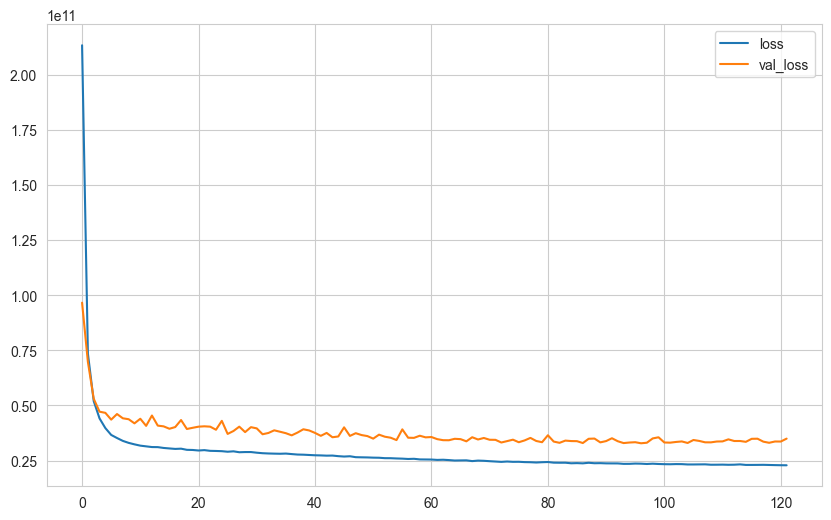

In [161]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [163]:
y_pred = model.predict(X_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [165]:
eval_metric(y_test, y_pred)

r2_score: 0.8442363518155375 
mae: 92676.93666087963 
mse: 20012476437.20098 
rmse: 141465.460226873


In [167]:
from tensorflow.keras.saving import save_model

save_model(model, 'model_kc_house.keras')

# <font color='orange'> <b>Loading Model and Scaler</b><font color='black'>  

In [169]:
from tensorflow.keras.models import load_model

In [171]:
model_kc_house = load_model('model_kc_house.keras')

In [173]:
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

# <font color='orange'> <b>Prediction</b><font color='black'>  

In [175]:
single_house = df.drop('price', axis = 1).iloc[0:1, :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,False,False,False,False,False,False,False,False,False,True,False,False


In [177]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [179]:
model_kc_house.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[282157.2]], dtype=float32)

In [181]:
df.iloc[0][0]

221900.0

# <font color='orange'> <b>Comparison with ML</b><font color='black'>  

## <font color='gold'> <b>Linear Regression</b><font color='black'>  

In [183]:
from sklearn.linear_model import LinearRegression 

In [185]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
y_pred = ln_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.7168439905813015 
mae: 122192.94755096364 
mse: 36379816681.18641 
rmse: 190734.93828133956


## <font color='gold'> <b>Random Forest</b><font color='black'>  

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
rf_model = RandomForestRegressor(random_state = 101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: 0.8886293030442941 
mae: 64785.36375462963 
mse: 14308880631.643038 
rmse: 119619.73345415479


<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>